## Context:
Forbes is a media and publishing company based in the United States that is controlled by Integrated Whale Media Investments and the Forbes family. It is well-known for its magazine and rankings of billionaires and sports teams. As a newly hired Data Scientist of Forbes company, you have been given the task of analyzing the net worth of Forbes Top Billionaires 2020. Your goal is to analyze the data and draw insights.

## Problem Statement
Analyze the net worth of Forbes Top Billionaires 2020.

**Data Dictionary**

Name - Name of the person
<br>
Net worth in billions - Net worth of the person in billions
<br>
Country - Country where the person is from
<br>
Source - Source of the income
<br>
Rank - Rank of the person in the Billionaires list
<br>
Age - Age of the person
<br>
Industry - Industry to which the person is related to

## Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading dataset and understanding it

In [42]:
df=pd.read_csv("Forbes+Billionaire+2020.csv")

### Looking at top 5 rows

In [43]:
df.head()

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology


### Dimension of data 

In [44]:
df.shape

(2755, 7)

### Datatypes of the columns in the dataframe

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2755 non-null   object 
 1   NetWorth in billions  2755 non-null   float64
 2   Country               2755 non-null   object 
 3   Source                2755 non-null   object 
 4   Rank                  2755 non-null   int64  
 5   Age                   2755 non-null   int64  
 6   Industry              2755 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.8+ KB


In [46]:
df.describe()

,NetWorth in billions,Rank,Age
count,2755.000000,2755.000000,2755.000000
mean,4.749220,1345.663521,63.014519
std,9.615358,772.669811,13.259017
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,62.000000
75%,4.200000,2035.000000,72.000000
max,177.000000,2674.000000,97.000000


### checking missing values

In [47]:
df.isnull().sum()

Name                    0
NetWorth in billions    0
Country                 0
Source                  0
Rank                    0
Age                     0
Industry                0
dtype: int64

### Box plots - helps in checking outliers

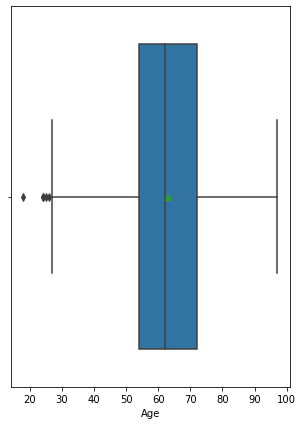

In [82]:
plt.figure(figsize=(5,7))
sns.boxplot(x='Age',data=df,showmeans=True)
plt.show()

### Data Analysis

### Summery of data

In [49]:
df[['NetWorth in billions','Age']].describe()

,NetWorth in billions,Age
count,2755.000000,2755.000000
mean,4.749220,63.014519
std,9.615358,13.259017
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,62.000000
75%,4.200000,72.000000
max,177.000000,97.000000


### Distribution of Age variable

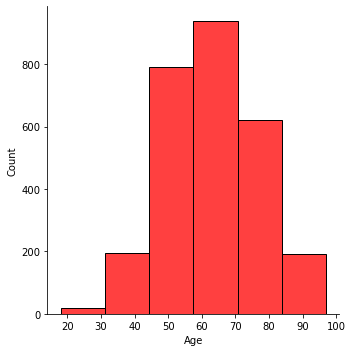

In [50]:
sns.displot(df['Age'],kde=False,color='red',bins=6)
plt.show()

#### Which 5 countries have the maximum billiionaries?

In [51]:
df['Country'].value_counts().head(5)

United States    724
China            626
India            140
Germany          136
Russia           118
Name: Country, dtype: int64

#### Which countries do the 5 youngest billionaires belong to?

In [52]:
df.sort_values(by="Age").head()['Country'].unique()

array(['Germany', 'Norway', 'China', 'United States'], dtype=object)

#### Countplot for industry

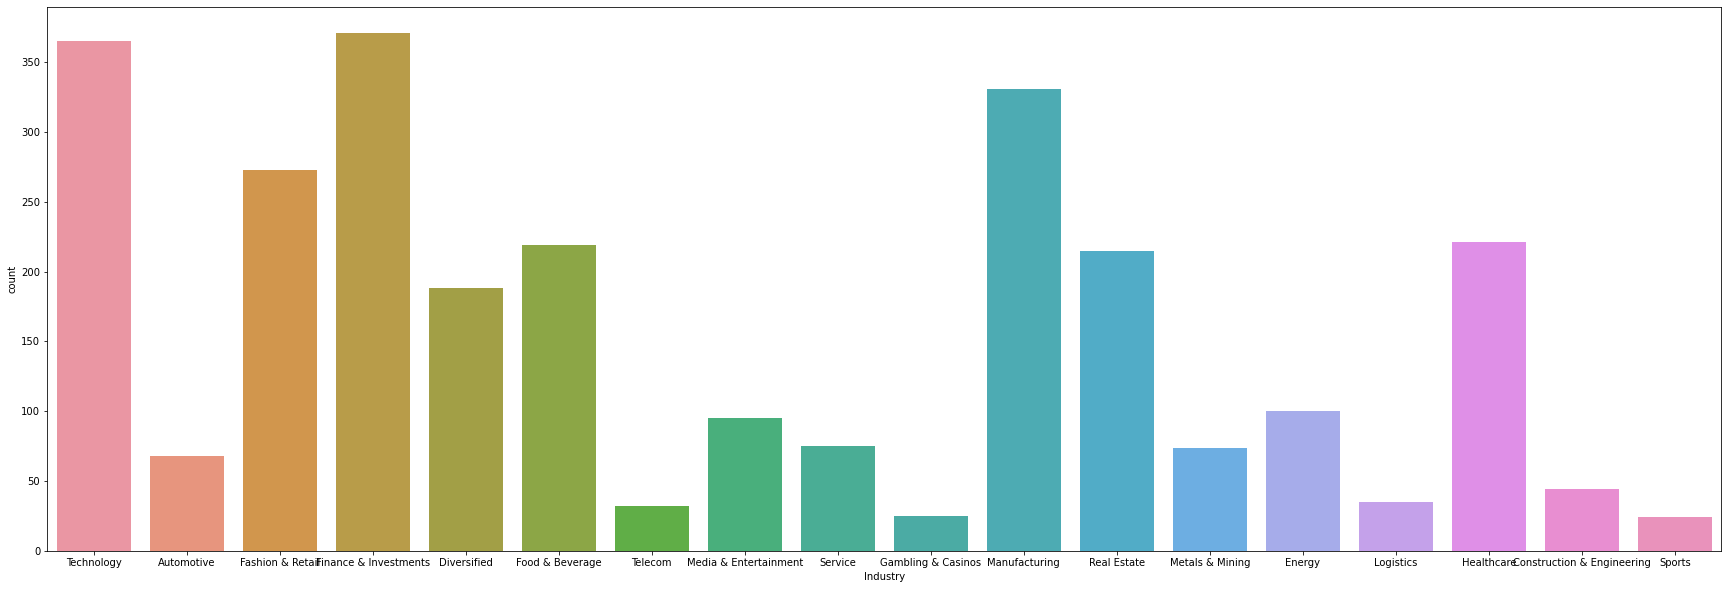

In [88]:
plt.figure(figsize=(30,10))
sns.countplot(x='Industry',data=df)
plt.show()

In [89]:
df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

#### Name all the billionaires who are younger than 50 years

In [97]:
df.loc[(df['Country']=='India') & (df['Age']<50)].Name.values

array(['Byju Raveendran and Divya Gokulnath', 'Vijay Shekhar Sharma',
       'Acharya Balkrishna', 'Radha Vembu', 'Ranjan Pai', 'Sachin Bansal',
       'Binny Bansal', 'Sekar Vembu'], dtype=object)

#### Pie chart 

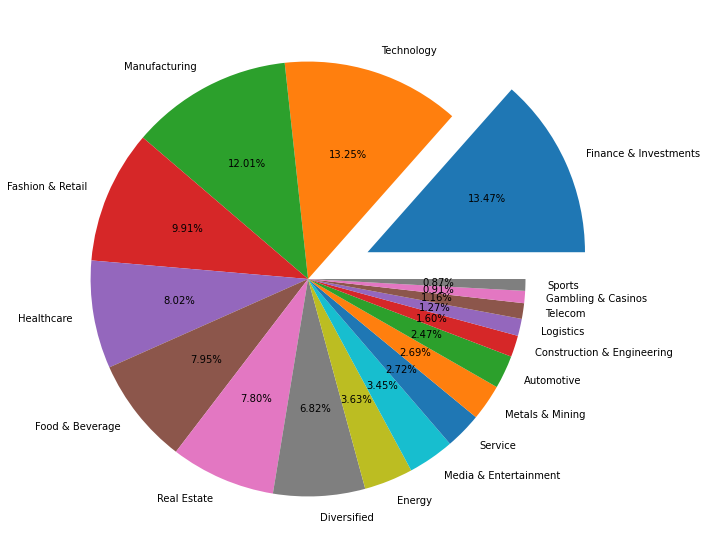

In [112]:
plt.figure(figsize=(10,10))
plt.pie(df["Industry"].value_counts(),labels=df['Industry'].value_counts().index,autopct='%.2f%%',
        explode=(0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.show()

### To check age distribution by industry

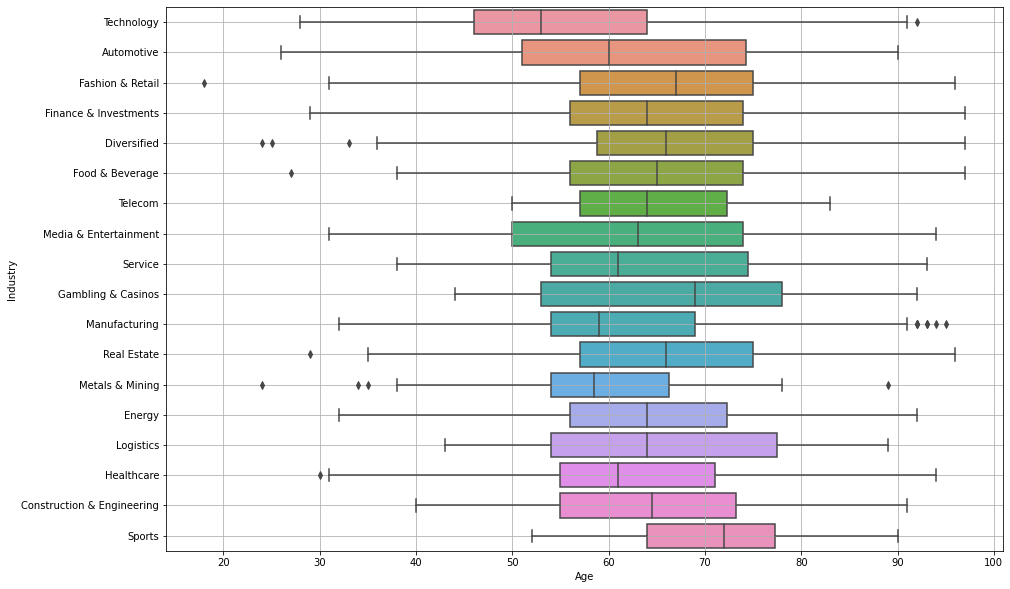

In [116]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Age',y='Industry',data=df)
plt.grid()
plt.show()

#### use strip plot

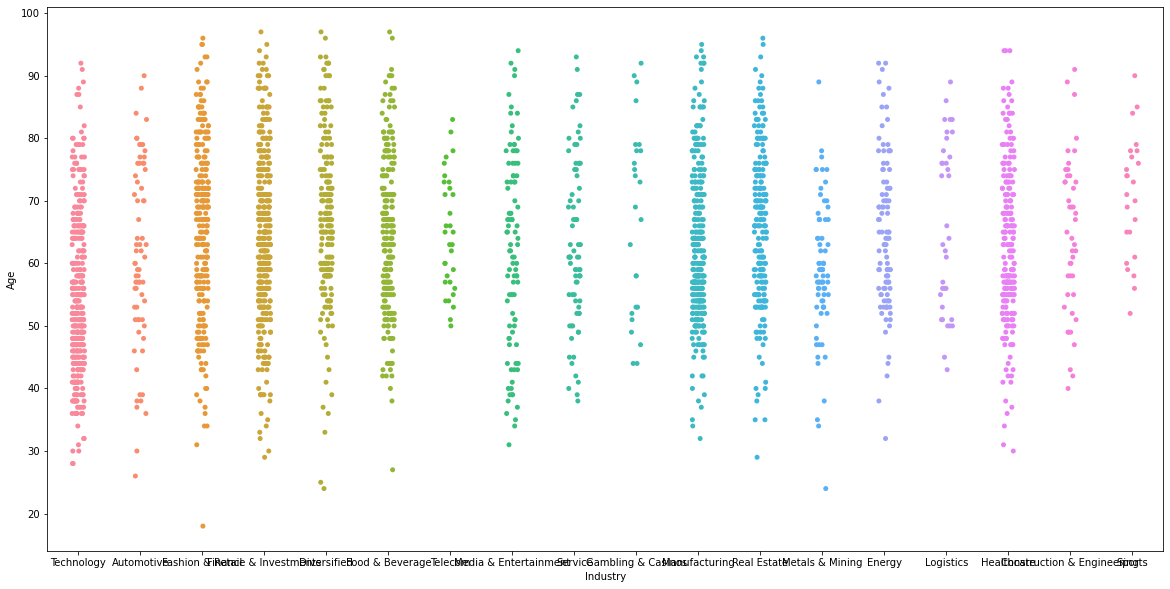

In [118]:
plt.figure(figsize=(20,10))
sns.stripplot(x='Industry',y='Age',data=df)
plt.show()

### scatter plot

<Figure size 576x576 with 0 Axes>

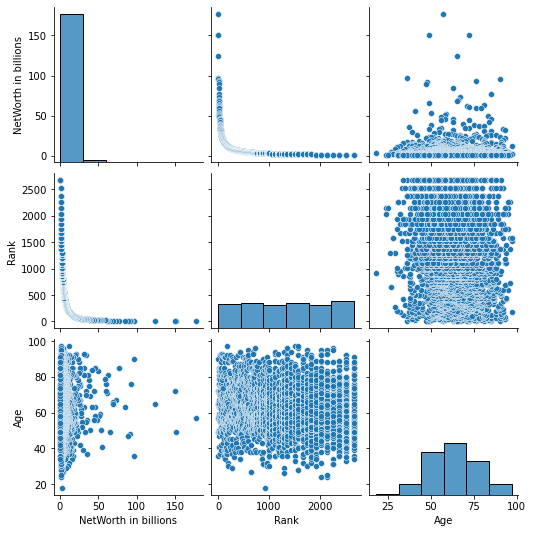

In [119]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df,diag_kws={'bins':6})
plt.show()

### Heat map

In [121]:
corr_matrix=df.corr()
corr_matrix

,NetWorth in billions,Rank,Age
NetWorth in billions,1.000000,-0.475346,0.035225
Rank,-0.475346,1.000000,-0.104220
Age,0.035225,-0.104220,1.000000


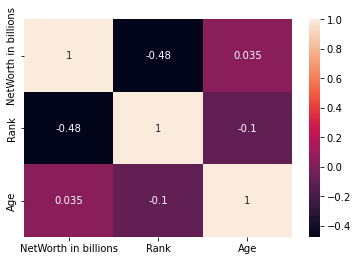

In [122]:
sns.heatmap(df.corr(),annot=True)
plt.show()